# Introduction into Data Science with Python

## Preface

Over the last decades statistical analysis becomes more and more complex. Statisticians needs for software and machines to compute large matrices with complex operations arises. Since measurement has become more accurate, storage is easy to access/ share and the awareness that tracked data can be useful later for researcher of all fields, the amount of data available is tremendous. Therefore, modern statistical software also needs handle with large dataset, while providing efficient algorithms.

Statistics Software available:
    A. Proprietary
        - SPSS
        - STATA
        - GRETL
        - EViews
        - GAUSS
        - Matlab
        ...
    B: Open Source
        - R
        - Python
        - Julia
        - Octave
        ...
        
Currently, *Open Source* software is very popular:
    - free to use
    - support in forums from statisticians, scientists and professionals 
    - infinitely expandable by user-based packages
    - very easy to start group project since it's free
    
Why to use **Python**?<br>
<b>R</b> is widely used in all fields, providing a large amount on packages and with a very responsive fan-base providing support. It's still very slow in computing, requires a lot of computing performance and is not as easy to read the code as <b>Python</b>. For example, <b>R</b>-code requires many different *brackets* depending on their usage. Mixing up these *brackets* or missing one leads to errors in the code.<br>
Here <b>Python</b> shines with code easy to read and as a programming language mainly used to engineer software it provides a huge potential. Here the first difference appears. Since, <b>Python</b> is a programming language we first need to load packages which include functions and operations we later want to use for our analysis. For users of proprietary statistic software it might be uncontentious, to load packages to compute basic statistics.  

We use <b>Python</b> together with the Jupyter-Notebook Editor. Further information regarding the Editor can be found [here](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)

In [14]:
###############################################
### Introduction into Python
###############################################

## Preface - loading packages
import sys
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
import scipy.stats as ss

## Basic operations in Python

In [15]:
## Basic operations
# storing and computation
a=4
b=5
a+b

9

In [16]:
# Output 
print("Hello")

Hello


In [17]:
# IF Statements
if a == 4:
    print('a is four')
elif b == 5:
    print('b is five')
else:
    print('a is not four and b not five')

a is four


In [18]:
# Loops
for i in ["First", "Second", "Thrid"]:
    print(i, "rank")

First rank
Second rank
Thrid rank


In [19]:
for i in range(1,4): 
    print(i)

1
2
3


In [20]:
my_list = [1, 2, 3]
for i in my_list: 
    print(i)

1
2
3


In [21]:
# Functions
my_list = [0,1,2,3,4,5,6,7,8,9,10]
def func(x):
    res=0
    for i in x:
        if i>5:
         res = res + i
    return res

func(my_list)

40

In [22]:
# consulting the help-file
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, start=0, /)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers
    
    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



## Importing Data using Pandas package

In [23]:
# reading a stata file using the pandas package as "pd"
df = pd.read_stata('data/nswre74.dta')
df.head()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
0,1,37,11,1,0,1,1,0.0,0.0,9930.045898,1369.0
1,1,22,9,0,1,0,1,0.0,0.0,3595.894043,484.0
2,1,30,12,1,0,0,0,0.0,0.0,24909.449219,900.0
3,1,27,11,1,0,0,1,0.0,0.0,7506.145996,729.0
4,1,33,8,1,0,0,1,0.0,0.0,289.789886,1089.0


In [24]:
df.describe()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,2102.265381,1377.138306,5300.764160,693.977539
std,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5363.582520,3150.960693,6631.491699,429.781799
min,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,289.000000
25%,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,400.000000
50%,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,3701.812012,576.000000
75%,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,824.388916,1220.836060,8124.714844,784.000000
max,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,39570.679688,25142.240234,60307.929688,3025.000000


Text(0, 0.5, 're74')

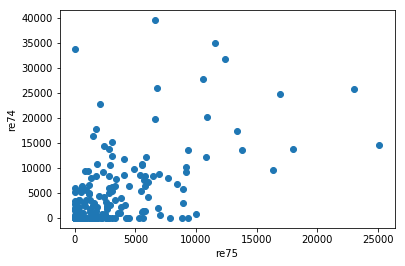

In [25]:
# producing a simple scatter plot
plt.scatter(df.re75, df.re74)
plt.xlabel('re75')
plt.ylabel('re74')

## Regressions in Python using Statsmodels package

In [26]:
# using statsmodels as "sm"
y, x = dmatrices('re78 ~ treat + black', data = df)

model_spec = sm.OLS(y, x)
results = model_spec.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     7.239
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           0.000806
Time:                        16:15:39   Log-Likelihood:                -4539.6
No. Observations:                 445   AIC:                             9085.
Df Residuals:                     442   BIC:                             9097.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6289.1908    799.274      7.869      0.0